# MatchCake Example


<table class="nt-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://MatchCake.github.io/MatchCake/"><img src="https://github.com/MatchCake/MatchCake/blob/main/images/logo/logo_32px.png?raw=true" width=32px height=32px  />Documentation</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/MatchCake/MatchCake/blob/main/tutorials/matchcake_basics.ipynb"><img src="https://github.com/MatchCake/MatchCake/blob/main/images/logo/colab_logo_32px.png?raw=true" width=32px height=32px  />Run in Google Colab</a>
</td>
  <td>
    <a target="_blank" href="https://github.com/MatchCake/MatchCake/blob/main/tutorials/matchcake_basics.ipynb"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width=32px height=32px />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/MatchCake/MatchCake/blob/main/tutorials/iris_classification.ipynb"><img src="https://github.com/MatchCake/MatchCake/blob/main/images/logo/download_logo_32px.png?raw=true" width=32px height=32px />Download notebook</a>
  </td>
</table>

In this example, we will use the `matchcake` library to create a simple quantum circuit using the `NonInteractingFermionicDevice` and the `fRXX`, `fRYY`, `fRZZ`, and `fSWAP` operations. We will then use PennyLane to create a QNode and evaluate the expectation value of the circuit.

# Setup

You can now install the dependencies by running the following commands:

In [ ]:
#@title Install dependencies {display-mode: "form"}

RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

if RunningInCOLAB:
    !git clone https://github.com/MatchCake/MatchCake.git
    %cd MatchCake/
else:
    !pip install -r requirements.txt

!pip install git+https://github.com/MatchCake/MatchCake.git

# Imports

We start by importing the necessary libraries.

In [1]:
import matchcake as mc
import pennylane as qml
import numpy as np
from pennylane.ops.qubit.observables import BasisStateProjector

# Create the NonInteractingFermionicDevice

We start by creating a `NonInteractingFermionicDevice` with 4 wires. We also define the initial state as the zero state.

In [2]:
nif_device = mc.NonInteractingFermionicDevice(wires=4)
initial_state = np.zeros(len(nif_device.wires), dtype=int)

# Define the circuit

We define a simple circuit that applies the `fRXX`, `fRYY`, `fRZZ`, and `fSWAP` operations to the initial state. We also include a `BasisStateProjector` to measure the expectation value of the circuit.

In [3]:
def circuit(params, wires, initial_state=None):
    qml.BasisState(initial_state, wires=wires)
    for i, even_wire in enumerate(wires[:-1:2]):
        idx = list(wires).index(even_wire)
        curr_wires = [wires[idx], wires[idx + 1]]
        mc.operations.fRXX(params, wires=curr_wires)
        mc.operations.fRYY(params, wires=curr_wires)
        mc.operations.fRZZ(params, wires=curr_wires)
    for i, odd_wire in enumerate(wires[1:-1:2]):
        idx = list(wires).index(odd_wire)
        mc.operations.fSWAP(wires=[wires[idx], wires[idx + 1]])
    projector: BasisStateProjector = qml.Projector(initial_state, wires=wires)
    return qml.expval(projector)

# Create the QNode

We create a QNode using PennyLane and the `NonInteractingFermionicDevice` we defined earlier.

In [4]:
nif_qnode = qml.QNode(circuit, nif_device)

# Draw the circuit

We can draw the circuit using PennyLane's `draw_mpl` function.

(<Figure size 800x500 with 1 Axes>, <Axes: >)

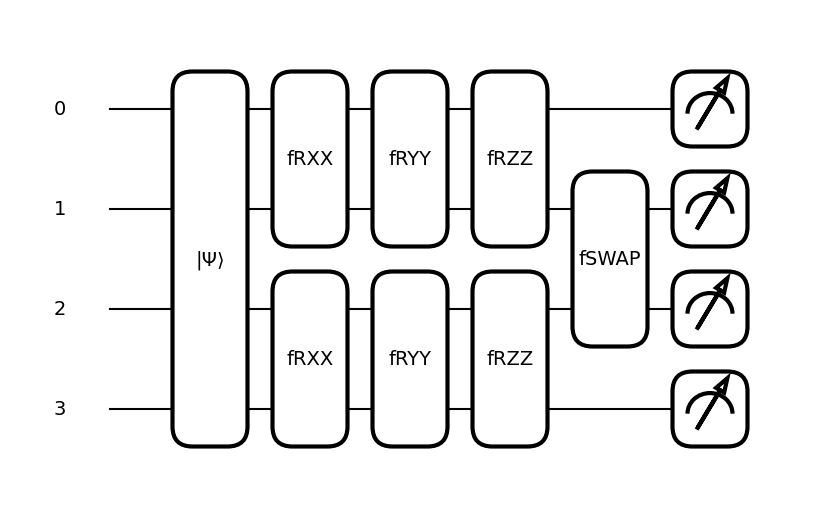

In [5]:
qml.draw_mpl(nif_qnode)(np.array([0.1, 0.2]), wires=nif_device.wires, initial_state=initial_state)

# Evaluate the QNode

We can now evaluate the QNode using some random parameters.

In [6]:
params = np.random.random(2)

In [7]:
expval = nif_qnode(params, wires=nif_device.wires, initial_state=initial_state)

# Print the expectation value

We print the expectation value of the circuit.

In [8]:
print(f"Expectation value: {expval}")

Expectation value: 0.9772074453829572
